In [ ]:
%pip install pandas
%pip install statsmodels
%pip install matplotlib
%pip install seaborn
%pip install numpy
%pip install scikit-learn

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, scale 
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv(r"..\data\unemploy_monthly\group_merge (2).csv")
data

time           city          co        no2          pm  so2  unemploy
0     2018-01       Agartala  702.877618  74.768128  124.487853  NaN     31.11
1     2018-02       Agartala  601.352682  70.688495   99.257437  NaN     30.23
2     2018-03       Agartala  799.883387  62.148303   92.075540  NaN     15.19
3     2018-04       Agartala  873.032811  76.564293   70.507268  NaN     13.55
4     2018-05       Agartala  891.619460  50.883278   30.899446  NaN     23.68
...       ...            ...         ...        ...         ...  ...       ...
2395  2021-08  Visakhapatnam         NaN        NaN   56.835309  NaN      6.49
2396  2021-09  Visakhapatnam         NaN        NaN   64.155097  NaN      6.07
2397  2021-10  Visakhapatnam         NaN        NaN  104.236008  NaN      5.37
2398  2021-11  Visakhapatnam         NaN        NaN   90.995164  NaN      6.33
2399  2021-12  Visakhapatnam         NaN        NaN  112.914113  NaN      5.62

[2400 rows x 7 columns]

In [3]:

data = data.dropna()
x = data[[ 'co', 'no2', 'pm', 'so2']]
y = data[['unemploy']]

In [4]:
# Univariate for co
x = data['co']
y = data['unemploy']

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:               unemploy   R-squared (uncentered):                   0.479
Model:                            OLS   Adj. R-squared (uncentered):              0.478
Method:                 Least Squares   F-statistic:                              484.7
Date:                Wed, 14 Dec 2022   Prob (F-statistic):                    1.15e-76
Time:                        17:26:13   Log-Likelihood:                         -1896.6
No. Observations:                 528   AIC:                                      3795.
Df Residuals:                     527   BIC:                                      3800.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Text(0, 0.5, 'Unemployment Rate')

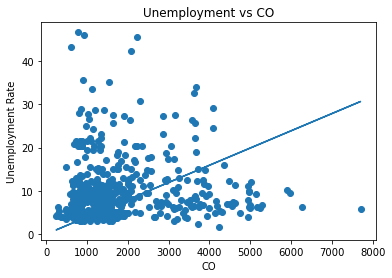

In [5]:
# plot for Univariate for co
plt.scatter(x,y)
print_model = model
plt.plot(x, predictions)
plt.title('Unemployment vs CO')
plt.xlabel('CO')
plt.ylabel('Unemployment Rate')

In [6]:
# Univariate for No2
x = data['no2']
y = data['unemploy']

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:               unemploy   R-squared (uncentered):                   0.550
Model:                            OLS   Adj. R-squared (uncentered):              0.549
Method:                 Least Squares   F-statistic:                              644.2
Date:                Wed, 14 Dec 2022   Prob (F-statistic):                    1.92e-93
Time:                        17:26:15   Log-Likelihood:                         -1858.0
No. Observations:                 528   AIC:                                      3718.
Df Residuals:                     527   BIC:                                      3722.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Text(0, 0.5, 'Unemployment Rate')

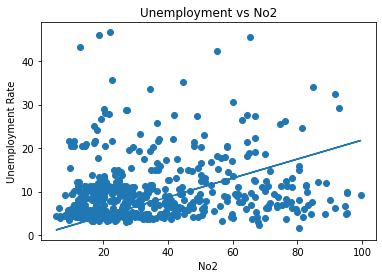

In [7]:
plt.scatter(x,y)
print_model = model
plt.plot(x, predictions)
plt.title('Unemployment vs No2')
plt.xlabel('No2')
plt.ylabel('Unemployment Rate')

In [8]:
x = data['pm']
y = data['unemploy']

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:               unemploy   R-squared (uncentered):                   0.467
Model:                            OLS   Adj. R-squared (uncentered):              0.466
Method:                 Least Squares   F-statistic:                              462.6
Date:                Wed, 14 Dec 2022   Prob (F-statistic):                    3.96e-74
Time:                        17:26:16   Log-Likelihood:                         -1902.5
No. Observations:                 528   AIC:                                      3807.
Df Residuals:                     527   BIC:                                      3811.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Text(0, 0.5, 'Unemployment Rate')

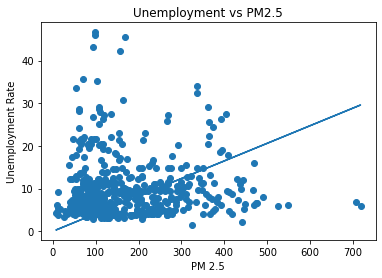

In [9]:
plt.scatter(x,y)
print_model = model
plt.plot(x, predictions)
plt.title('Unemployment vs PM2.5')
plt.xlabel('PM 2.5')
plt.ylabel('Unemployment Rate')

In [10]:
x = data['so2']
y = data['unemploy']

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:               unemploy   R-squared (uncentered):                   0.493
Model:                            OLS   Adj. R-squared (uncentered):              0.492
Method:                 Least Squares   F-statistic:                              511.8
Date:                Wed, 14 Dec 2022   Prob (F-statistic):                    1.07e-79
Time:                        17:26:16   Log-Likelihood:                         -1889.7
No. Observations:                 528   AIC:                                      3781.
Df Residuals:                     527   BIC:                                      3786.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Text(0, 0.5, 'Unemployment Rate')

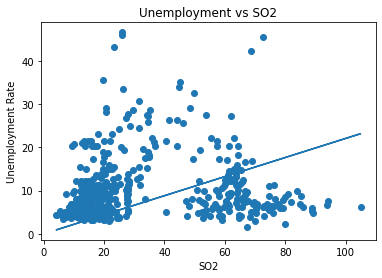

In [11]:
plt.scatter(x,y)
print_model = model
plt.plot(x, predictions)
plt.title('Unemployment vs SO2')
plt.xlabel('SO2')
plt.ylabel('Unemployment Rate')

In [12]:
df = data[['co', 'so2', 'no2', 'pm']]

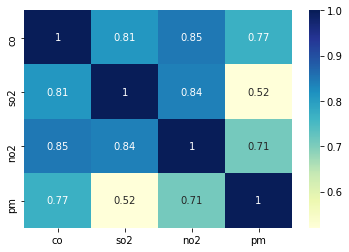

In [13]:
corr = df.corr().round(2)
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.show()

In [14]:
data

time      city           co        no2          pm        so2  \
48   2018-01      Agra  1230.652246  36.356861  229.784920  15.985654   
49   2018-02      Agra  1073.597106  34.708423  211.790513  17.509285   
50   2018-03      Agra  1234.605953  28.064507  125.559256  16.281662   
51   2018-04      Agra  1296.376160  19.410273   70.864102  16.064301   
52   2018-05      Agra  1328.891031  25.704473   86.155017  12.164051   
..       ...       ...          ...        ...         ...        ...   
859  2021-08  Varanasi   762.190067  17.779099   50.756599  11.508552   
860  2021-09  Varanasi   883.017819  17.078762   77.962042   9.740169   
861  2021-10  Varanasi  1579.988293  27.753788  166.600269  14.921538   
862  2021-11  Varanasi  2288.217650  45.094299  281.081972  20.756329   
863  2021-12  Varanasi  1903.899462  42.480102  234.002272  18.974057   

     unemploy  
48       4.03  
49       3.93  
50       3.14  
51       5.56  
52       5.21  
..        ...  
859      6.98  
860      4.98  
861      4.22  
862      4.83  
863      4.86  

[528 rows x 7 columns]

In [17]:
x = data[['co','no2','pm','so2']]

In [18]:

pca = PCA()
X_reduced = pca.fit_transform(x)
pca.explained_variance_ratio_

array([9.96111267e-01, 3.68531613e-03, 1.60611387e-04, 4.28056446e-05])

([<matplotlib.axis.XTick at 0x2371fa10be0>,
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

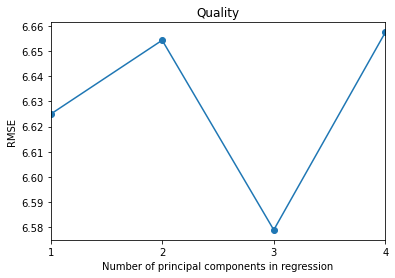

In [19]:
lin_reg = LinearRegression()

rmse_list = []

for i in range(1, X_reduced.shape[1]+1):
    rmse_score = -1 * cross_val_score(lin_reg, 
                X_reduced[:,:i], 
                y, 
                cv=10, 
                scoring='neg_root_mean_squared_error').mean()
    rmse_list.append(rmse_score)

plt.plot(rmse_list, '-o')
plt.xlabel('Number of principal components in regression')
plt.ylabel('RMSE')
plt.title('Quality')
plt.xlim(0, 3);
plt.xticks(np.arange(X_reduced.shape[1]), np.arange(1, X_reduced.shape[1]+1))

In [20]:
data['lag'] = data.groupby('city')['unemploy'].shift()

C:\Users\wwwxjh\AppData\Local\Temp/ipykernel_9508/1568506659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['lag'] = data.groupby('city')['unemploy'].shift()


In [21]:
new_x = data[['co','no2','pm','so2','lag']]
new_x = new_x.dropna()

In [22]:
pca = PCA(n_components=4)
pca_x = pca.fit(new_x)


In [23]:
columns = ['pca_comp_%i' % i for i in range(4)]
df_pca  = pd.DataFrame(pca.transform(new_x), columns=columns, index=new_x.index)
df_pca.head()

pca_comp_0  pca_comp_1  pca_comp_2  pca_comp_3
49 -662.981834   97.132360   -5.568670   -2.628739
50 -508.887286   -0.522332    5.497613   -3.596034
51 -451.446127  -59.674033   14.034833   -0.389698
52 -417.866021  -46.440437   13.162354   -7.330143
53 -562.406105  -31.564784   11.520874   -6.210502